<a href="https://colab.research.google.com/github/LicoriceAlex/pitch_deck_accelerator_of_opportunities/blob/main/Logo_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers accelerate

In [2]:
!gdown 1TbXtZIod6xah6052L6Ne_HhKYQR6ZHHC

Downloading...
From: https://drive.google.com/uc?id=1TbXtZIod6xah6052L6Ne_HhKYQR6ZHHC
To: /content/startup_base.csv
100% 180k/180k [00:00<00:00, 98.0MB/s]


In [3]:
import random

from diffusers import AutoPipelineForText2Image
import torch
import pandas as pd
import PIL

In [4]:
pipe = AutoPipelineForText2Image.from_pretrained("kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
df = pd.read_csv('startup_base.csv')
df

Название компании                    Рынок  \
0                  Unspot         Business Software   
1                   Реокат           IndustrialTech   
2                 Workface               E-commerce   
3                  Аллока   Advertising & Marketing   
4          Инновации Детям                 Hardware   
..                     ...                      ...   
266          ВИЗОРЛАБС\n\n    Transport & Logistics   
267         Biometric Labs    Transport & Logistics   
268  Consyst Smart Service    Transport & Logistics   
269             ДСТ-УРАЛ\n    Transport & Logistics   
270              Проект 80    Transport & Logistics   

                                            Что делают  \
0      Система для бронирования офисного пространства    
1               Производят катализаторы для нефтехимии   
2            Онлайн конструктор для интернет магазина    
3             Программа отслеживания рекламы с сайта.    
4    Создают итерактивное оборудование для обучения...   
..                                                 ...   
266                                                NaN   
267                                                NaN   
268                                                NaN   
269                                                NaN   
270                                                NaN   

                            Подробное описание проекта     Выручка (млн)  \
0    Система UnSpot – это программное обеспечение д...    До 100 млн.руб   
1    Компания ООО «РеоКат» работает в области серви...  100-500 млн.руб.   
2    Компания специализируется на разработке прилож...  100-500 млн.руб.   
3    Программа отслеживания рекламы с сайта. \nКолл...    До 100 млн.руб   
4    Playstand  — производитель интеректавно оборуд...  100-500 млн.руб.   
..                                                 ...               ...   
266  Платформа видеоаналитики VisorLabs позволяет с...    До 100 млн.руб   
267  Разработчик акустических датчиков и систем обр...    До 100 млн.руб   
268  Разработчик умного сервиса прогноза поломки об...    До 100 млн.руб   
269  Сделал функционирующий робот-бульдозер и показ...    До 100 млн.руб   
270  Завод "Урал" представил беспилотный грузовик. ...    До 100 млн.руб   

       Стадия Международный трекшн  \
0        Seed                   Да   
1     Раунд А                  Нет   
2     Раунд B                   Да   
3    Pre-seed                  Нет   
4     Раунд А                   Да   
..        ...                  ...   
266  Pre-seed                  Нет   
267  Pre-seed                  Нет   
268  Pre-seed                  Нет   
269  Pre-seed                  Нет   
270  Pre-seed                  Нет   

                                       Полезные ссылки  
0    Сайт: https://unspot.com/\n\n\nСсылка на Сбис:...  
1    Сайт: https://reocat.ru/\n\n\n\nСсылка на Сбис...  
2                                                  NaN  
3    Сайт: \nhttps://alloka.ru/\n\nСбис: \nhttps://...  
4    Сайт: \nhttps://playstand.ru/contacts/;\n\nСби...  
..                                                 ...  
266                              https://vizorlabs.ru/  
267                       http://www.biometriclabs.ru/  
268                      https://smartservice.cbgr.ru/  
269                                                NaN  
270                                                NaN  

[271 rows x 8 columns]

---

## Finding best prompts

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

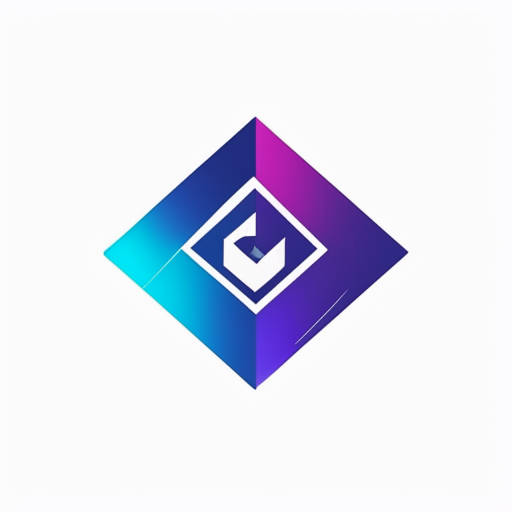

In [5]:
prompt = 'Vector logo of company, Программа отслеживания рекламы с сайта, minimalism, simple, gradient'

image = pipe(prompt=prompt, height=512, width=512).images[0]
image

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

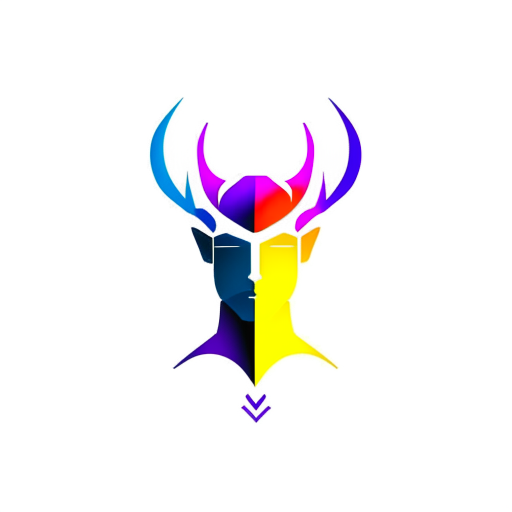

In [ ]:
negative_prompt = "low quality, bad quality, small"
prompt = 'Vector logo of company, Массовый HeadHunter, minimalism, simple, gradient'

image = pipe(prompt=prompt, negative_prompt=negative_prompt, prior_guidance_scale=1.0, height=512, width=512).images[0]
image

In [ ]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

['Vector logo of company, Система для бронирования офисного пространства , simple, no background, ', 'Vector logo of company, Производят катализаторы для нефтехимии, simple, no background, ', 'Vector logo of company, Онлайн конструктор для интернет магазина , simple, no background, ', 'Vector logo of company, Программа отслеживания рекламы с сайта. , simple, no background, ']


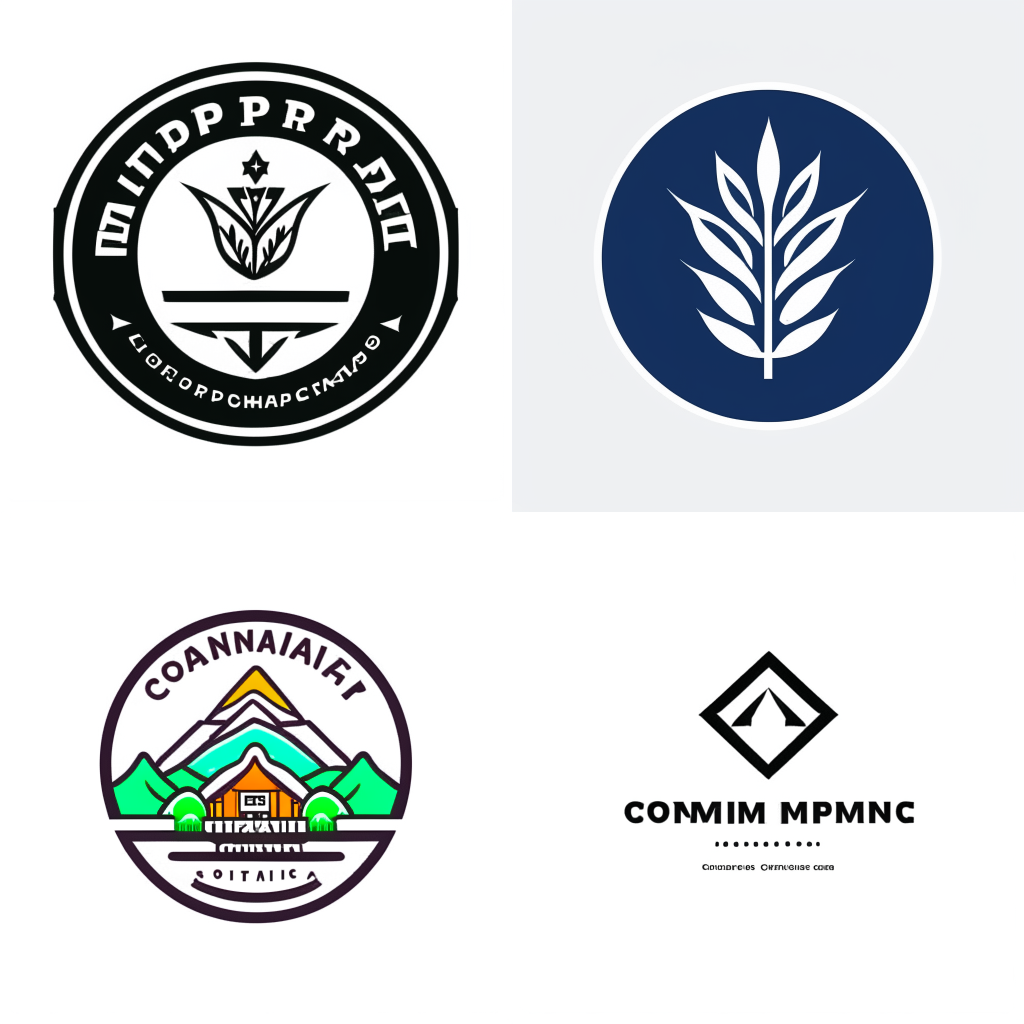

In [ ]:
imgs = []
p = 'Vector logo of company, '
negative_prompt = "low quality, bad quality, small"

prompts = []

for n in range(4):
    prompt = p + df.iloc[n]['Что делают'] + ', simple, no background'
    prompts.append(prompt)

    image = pipe(prompt=prompt, negative_prompt=negative_prompt, prior_guidance_scale=1.0, height=512, width=512).images[0]
    imgs.append(image)

print(prompts)
image_grid(imgs, 2, 2)

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

['Vector logo of company, Система для бронирования офисного пространства gradient', 'Vector logo of company, Производят катализаторы для нефтехимииline', 'Vector logo of company, Онлайн конструктор для интернет магазина gradient', 'Vector logo of company, Программа отслеживания рекламы с сайта. screen-print', 'Vector logo of company, Создают итерактивное оборудование для обучения детей geometric', 'Vector logo of company, Платформа управления документами с помощью AI. gradient', 'Vector logo of company, Аналитика полочного пространства line', 'Vector logo of company, Инновационная технология производства спг geometric', 'Vector logo of company, Инновационная технология производства спг geometric', 'Vector logo of company, Инновационная технология обеззараживания воды screen-print', 'Vector logo of company, Инновационная технология обеззараживания воды geometric', 'Vector logo of company, Получение сверхчистого водорода geometric', 'Vector logo of company, Получение сверхчистого водород

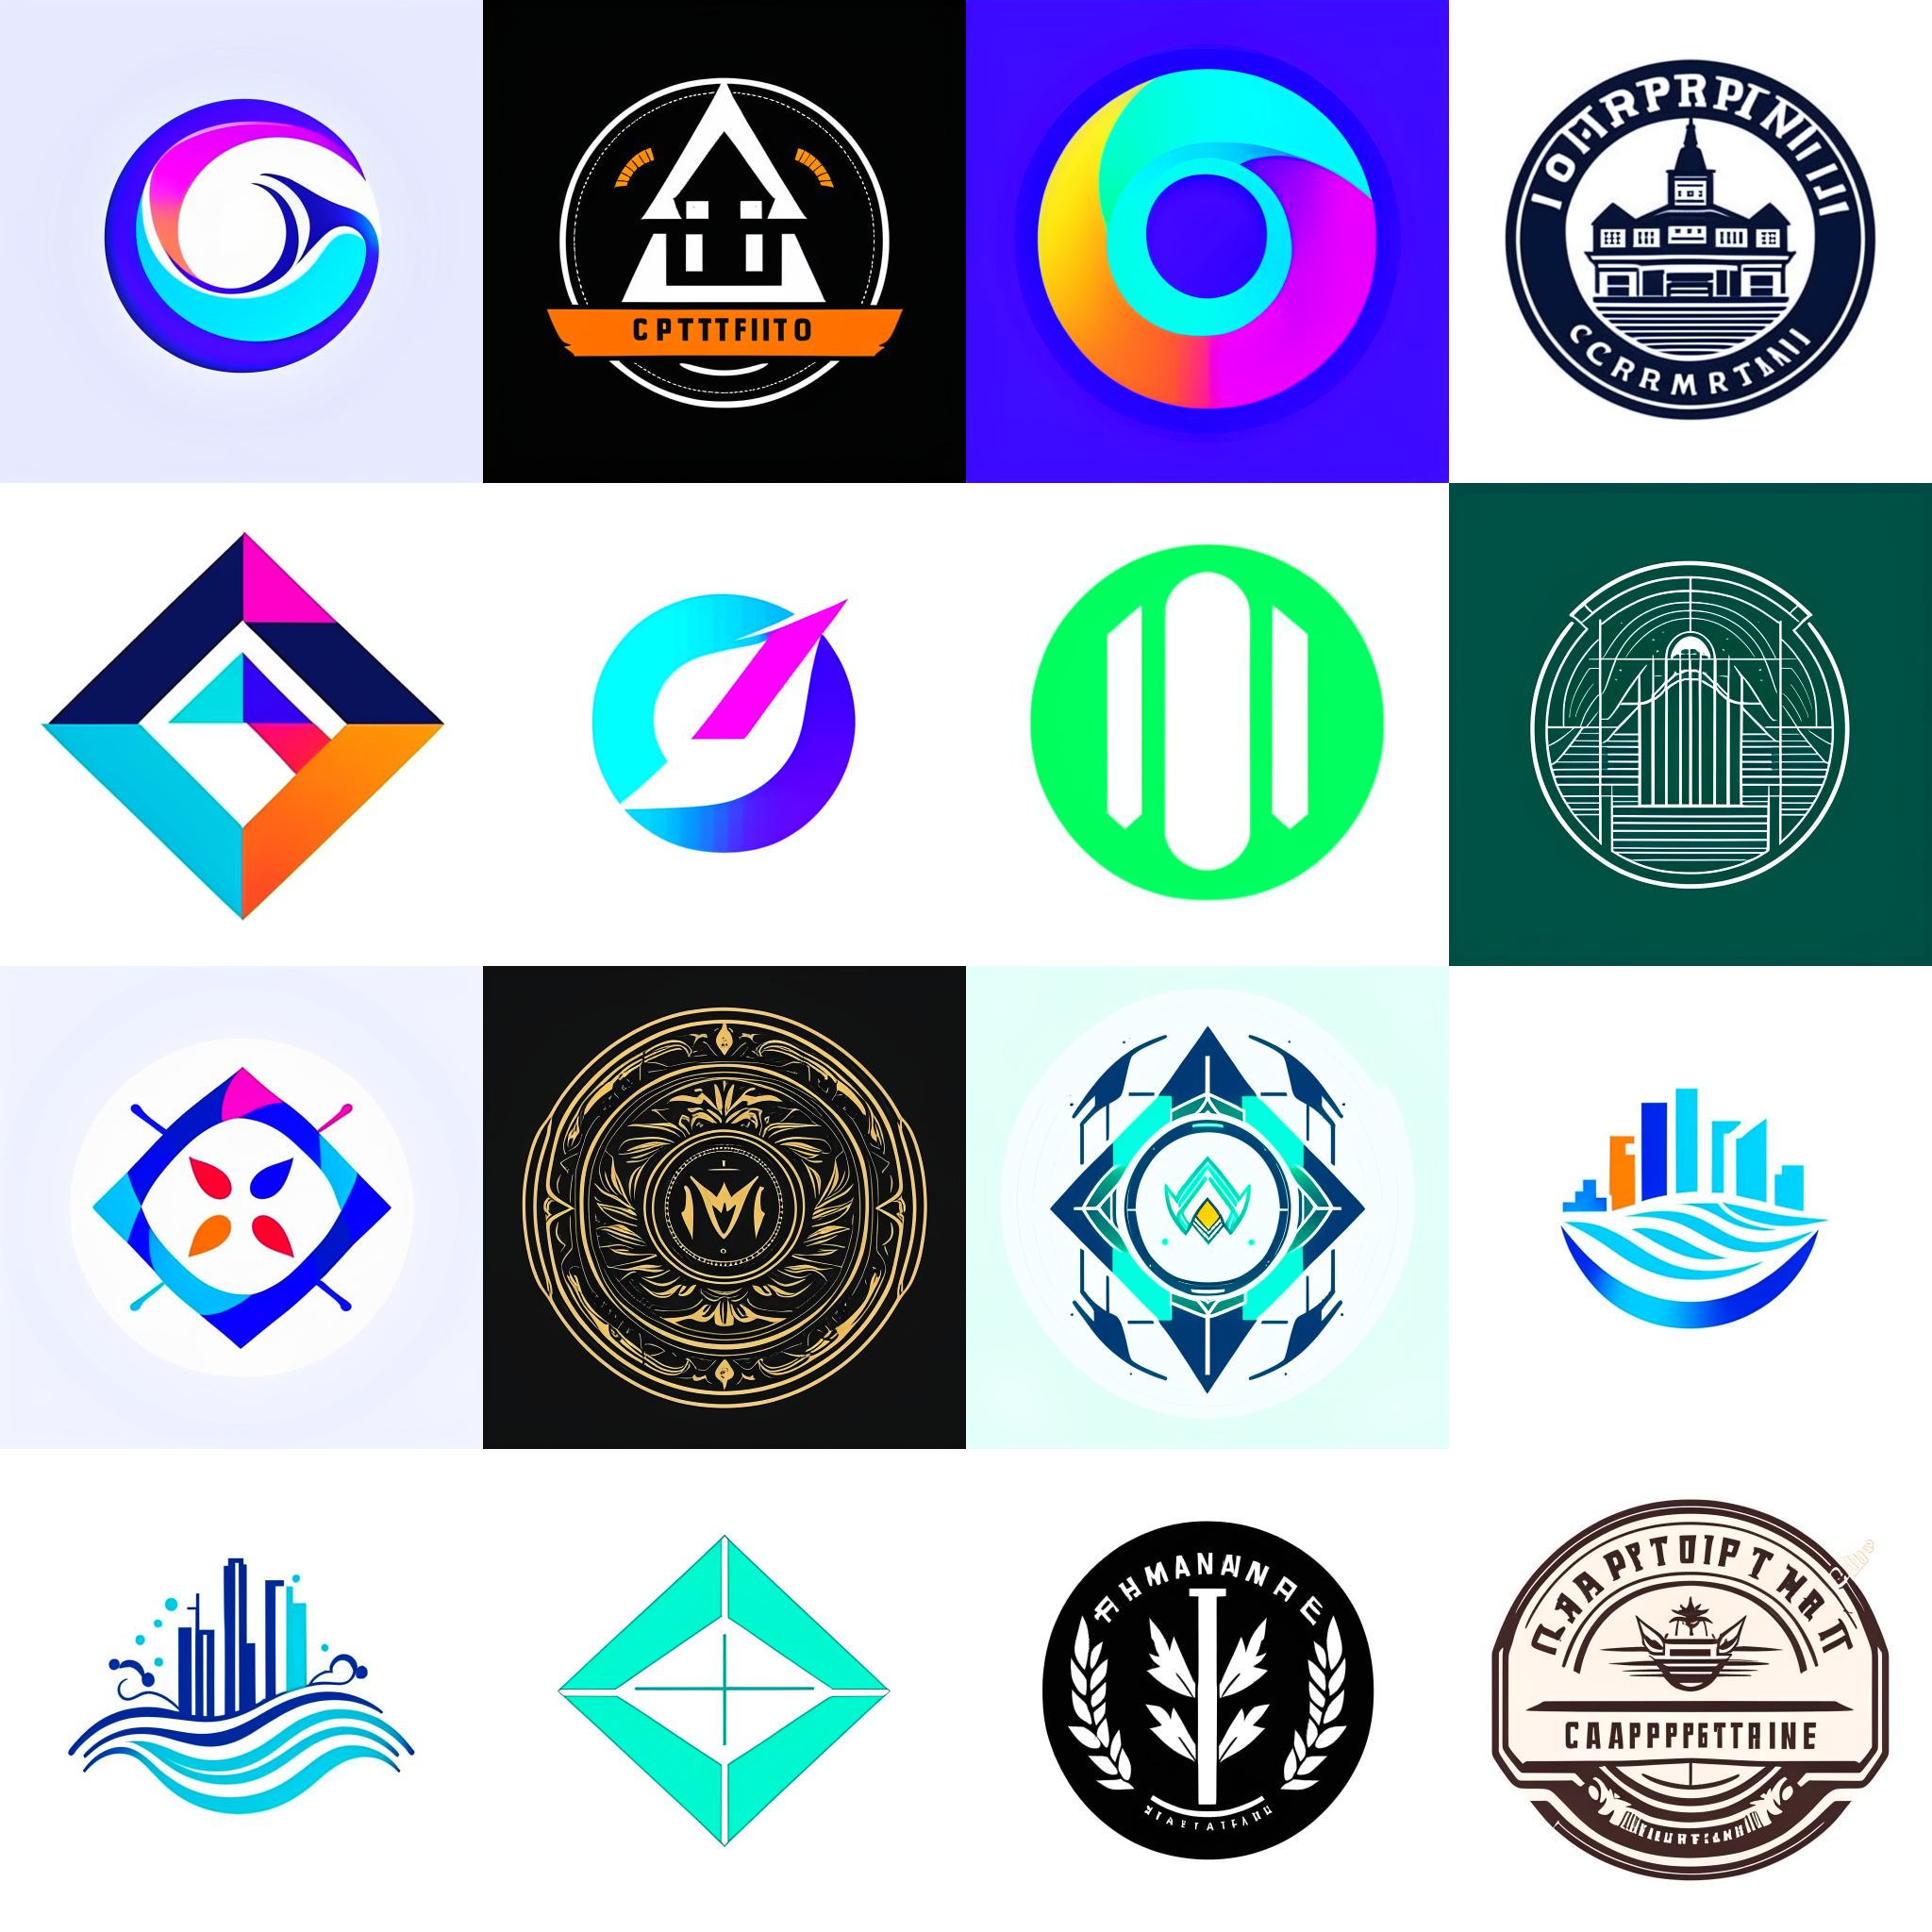

In [ ]:
imgs = []
p = 'Vector logo of company, '
negative_prompt = "text, small, background"

prompts = []

for n in range(16):
    prompt = p + df.iloc[n]['Что делают'] + random.choice(['gradient', 'screen-print', 'geometric', 'line'])
    prompts.append(prompt)
    image = pipe(prompt=prompt, negative_prompt=negative_prompt, prior_guidance_scale=1.0, height=512, width=512).images[0]
    imgs.append(image)

print(prompts)
image_grid(imgs, 4, 4)

---

## Generate logos for presentation

In [7]:
df

Название компании                    Рынок  \
0                  Unspot         Business Software   
1                   Реокат           IndustrialTech   
2                 Workface               E-commerce   
3                  Аллока   Advertising & Marketing   
4          Инновации Детям                 Hardware   
..                     ...                      ...   
266          ВИЗОРЛАБС\n\n    Transport & Logistics   
267         Biometric Labs    Transport & Logistics   
268  Consyst Smart Service    Transport & Logistics   
269             ДСТ-УРАЛ\n    Transport & Logistics   
270              Проект 80    Transport & Logistics   

                                            Что делают  \
0      Система для бронирования офисного пространства    
1               Производят катализаторы для нефтехимии   
2            Онлайн конструктор для интернет магазина    
3             Программа отслеживания рекламы с сайта.    
4    Создают итерактивное оборудование для обучения...   
..                                                 ...   
266                                                NaN   
267                                                NaN   
268                                                NaN   
269                                                NaN   
270                                                NaN   

                            Подробное описание проекта     Выручка (млн)  \
0    Система UnSpot – это программное обеспечение д...    До 100 млн.руб   
1    Компания ООО «РеоКат» работает в области серви...  100-500 млн.руб.   
2    Компания специализируется на разработке прилож...  100-500 млн.руб.   
3    Программа отслеживания рекламы с сайта. \nКолл...    До 100 млн.руб   
4    Playstand  — производитель интеректавно оборуд...  100-500 млн.руб.   
..                                                 ...               ...   
266  Платформа видеоаналитики VisorLabs позволяет с...    До 100 млн.руб   
267  Разработчик акустических датчиков и систем обр...    До 100 млн.руб   
268  Разработчик умного сервиса прогноза поломки об...    До 100 млн.руб   
269  Сделал функционирующий робот-бульдозер и показ...    До 100 млн.руб   
270  Завод "Урал" представил беспилотный грузовик. ...    До 100 млн.руб   

       Стадия Международный трекшн  \
0        Seed                   Да   
1     Раунд А                  Нет   
2     Раунд B                   Да   
3    Pre-seed                  Нет   
4     Раунд А                   Да   
..        ...                  ...   
266  Pre-seed                  Нет   
267  Pre-seed                  Нет   
268  Pre-seed                  Нет   
269  Pre-seed                  Нет   
270  Pre-seed                  Нет   

                                       Полезные ссылки  
0    Сайт: https://unspot.com/\n\n\nСсылка на Сбис:...  
1    Сайт: https://reocat.ru/\n\n\n\nСсылка на Сбис...  
2                                                  NaN  
3    Сайт: \nhttps://alloka.ru/\n\nСбис: \nhttps://...  
4    Сайт: \nhttps://playstand.ru/contacts/;\n\nСби...  
..                                                 ...  
266                              https://vizorlabs.ru/  
267                       http://www.biometriclabs.ru/  
268                      https://smartservice.cbgr.ru/  
269                                                NaN  
270                                                NaN  

[271 rows x 8 columns]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Vector logo of company, Производят катализаторы для нефтехимии, geometric, minimalism, simple


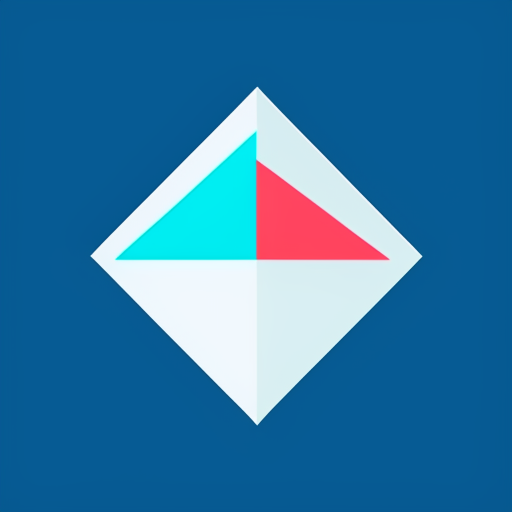

In [14]:
n = 1

negative_prompt = "text, small, background"
prompt = 'Vector logo of company, ' + df.iloc[n]['Что делают'] + ', ' + random.choice(['gradient', 'screen-print', 'geometric', 'line']) + ', minimalism, simple'

image = pipe(prompt=prompt, negative_prompt=negative_prompt, prior_guidance_scale=1.0, height=512, width=512).images[0]

print(prompt)
image